# Universidad Industrial de Santander
##Escuela de Ingeniería de Sistemas
###Inteligencia Artificial I
profesor: Gustavo Garzón

Realizado por:
* Wilmer Andres Romero Cala - 2214102
* Jhonalber David Rangel Medina - 2225510

## Tiroteos en USA
El presente proyecto se abarca un análisis descriptivo e inferencial sobre los tiroteos ocurridos en Estados Unidos. Con este fin, se utilizó un conjunto de datos que contiene información detallada sobre los incidentes de tiroteos, incluyendo variables como la fecha, ubicación, número de víctimas, entre otros. Esto con el objetivo de aplicar diferentes temas vistos en la asignatura durante el semeste académico en un contexto real y de relevancia social.

In [ ]:
#Importamos todas las librerias que se podrián llegar a usar en el desarrollo del proyecto
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
drive.mount('/content/drive/')
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
from sklearn.model_selection import cross_val_score, KFold
from matplotlib.gridspec import GridSpec

warnings.filterwarnings('ignore')

Mounted at /content/drive/


In [ ]:
#Adaptación del dataset para la implementación del proyecto
df = pd.read_csv("/content/drive/MyDrive/IA_Project_USA/TiroteosUSA.csv", sep=',')


In [ ]:
import numpy as np

def limpiar_edad(valor):
    if isinstance(valor, str) and ',' in valor:
        # Convertimos la cadena en una lista de números y calculamos su media
        numeros = [float(x) for x in valor.split(',')]
        return np.mean(numeros)  # Devuelve la media de los valores
    elif isinstance(valor, str) and valor.isdigit():
        return float(valor)  # Convierte valores numéricos de texto a float
    elif isinstance(valor, (int, float)):
        return valor  # Si ya es número, lo dejamos igual
    return np.nan  # Si no es un número válido, lo convertimos en NaN

df['Age'] = df['Age'].apply(limpiar_edad)

df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Employeed (Y/N)'] = df['Employeed (Y/N)'].fillna(0.0)
df['Policeman Killed'] = df['Policeman Killed'].fillna(0.0)
df['Employeed (Y/N)'] = df['Employeed (Y/N)'].fillna(0)
df['Policeman Killed'] = df['Policeman Killed'].fillna(0)
df['Mental Health Issues'] = df['Mental Health Issues'].fillna(0)
df['Fatalities'] = df['Fatalities'].fillna(0)
df['Injured'] = df['Injured'].fillna(0)
df['Total victims'] = df['Total victims'].fillna(0)

In [ ]:
columns_to_drop = ['S#', 'Unnamed: 0', 'Incident Area', 'Cause', 'Employed at', 'Title', 'Summary', 'Latitude', 'Longitude']
df = df.drop(columns=columns_to_drop, axis=1, errors='ignore')

In [ ]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Location              828 non-null    object 
 1   Date                  963 non-null    object 
 2   Open/Close Location   877 non-null    object 
 3   Target                946 non-null    object 
 4   Fatalities            963 non-null    int64  
 5   Injured               963 non-null    int64  
 6   Total victims         963 non-null    int64  
 7   Policeman Killed      963 non-null    float64
 8   Age                   963 non-null    float64
 9   Employeed (Y/N)       963 non-null    float64
 10  Mental Health Issues  963 non-null    object 
 11  Race                  957 non-null    object 
 12  Gender                963 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 97.9+ KB


,Location,Date,Open/Close Location,Target,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Mental Health Issues,Race,Gender
0,"Las Vegas, NV",10/1/2017,NaN,NaN,58,527,585,0.0,31.553875,0.0,Unclear,White,M
1,"San Francisco, CA",6/14/2017,Close,coworkers,3,2,5,0.0,38.000000,1.0,Yes,Asian,M
2,"Tunkhannock, PA",6/7/2017,Close,coworkers,3,0,3,0.0,24.000000,1.0,Unclear,White,M
3,"Orlando, Florida",6/5/2017,Close,coworkers,5,0,5,0.0,45.000000,1.0,Unclear,NaN,M
4,"Kirkersville, Ohio",5/12/2017,Close,coworkers,3,0,3,1.0,43.000000,1.0,Yes,White,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,"Chicago, Illinois",1/17/1974,Close,Teachers,1,3,4,0.0,14.000000,0.0,Yes,Unknown,Male
959,"New Orleans, Louisiana",12/31/1972,NaN,random,10,13,22,4.0,23.000000,0.0,Yes,Black American or African American,Male
960,"Spokane, Washington",11/11/1971,Close,random,2,4,5,0.0,31.553875,0.0,Yes,White American or European American,Male
961,"Mesa, Arizona",11/12/1966,Close,random,5,1,6,0.0,18.000000,0.0,Yes,White American or European American,Male


##Número de Tiroteos por Año

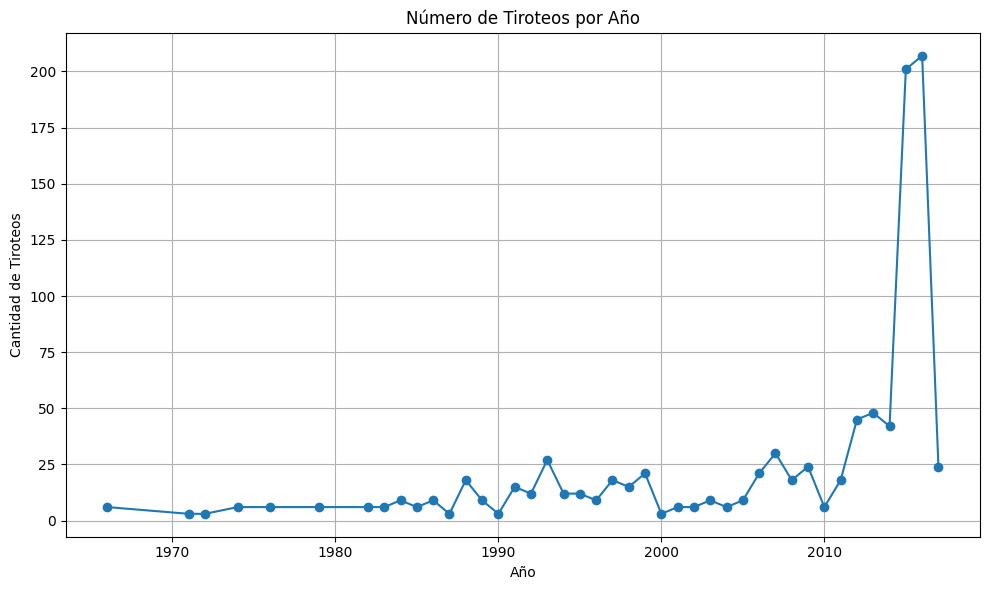

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['Year'] = df['Date'].dt.year

tiroteos_por_año = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
tiroteos_por_año.plot(kind='line', marker='o')
plt.title('Número de Tiroteos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Tiroteos')
plt.grid(True)
plt.tight_layout()
plt.show()

## Número de Tiroteos por Estado en EE.UU.

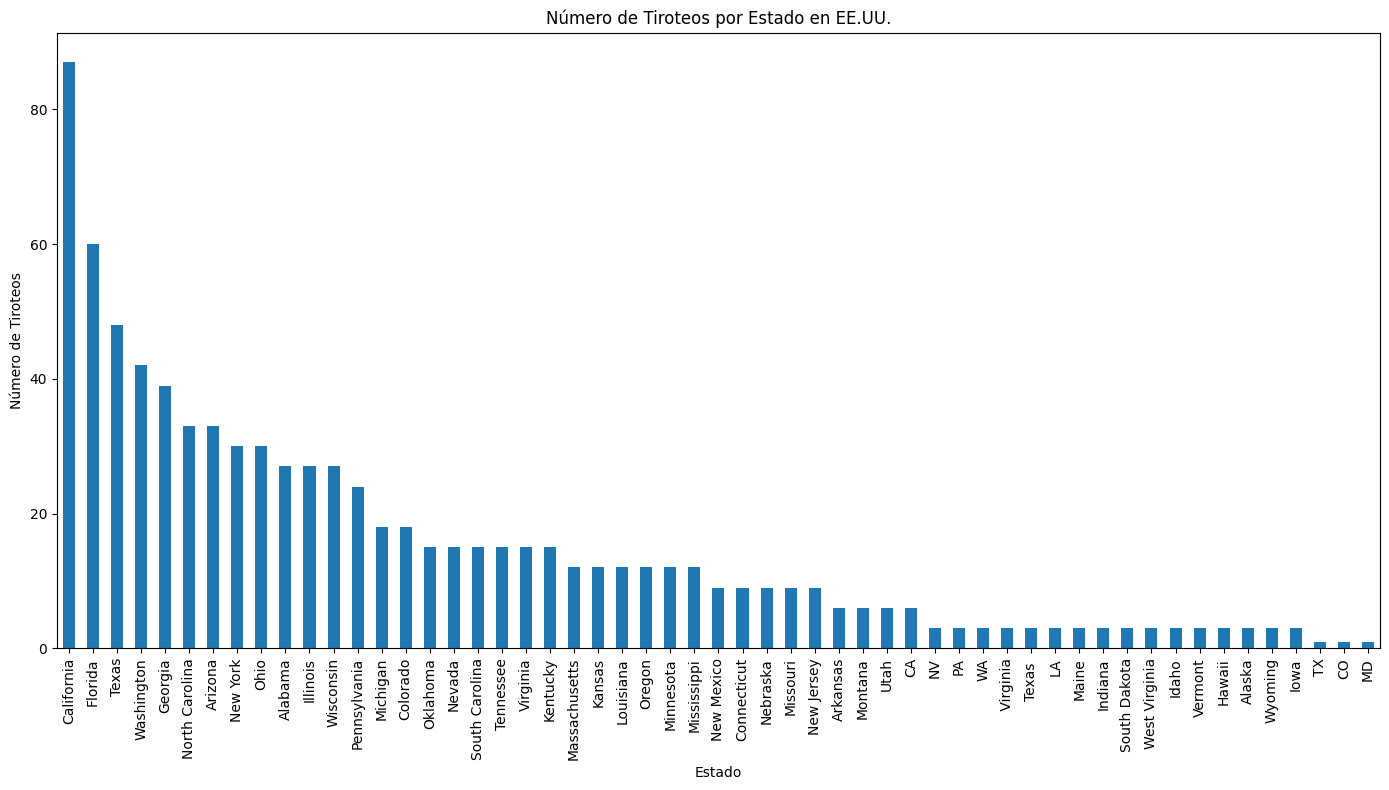

In [ ]:

df['Location'] = df['Location'].fillna('Unknown')

df['State'] = df['Location'].apply(lambda x: x.split(', ')[-1] if ', ' in x else 'Unknown')

df = df[df['State'] != 'Unknown']

tiroteos_por_estado = df['State'].value_counts()

plt.figure(figsize=(14, 8))
tiroteos_por_estado.plot(kind='bar')
plt.title('Número de Tiroteos por Estado en EE.UU.')
plt.xlabel('Estado')
plt.ylabel('Número de Tiroteos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Distribución de Tiroteos por Raza de los Perpetradores

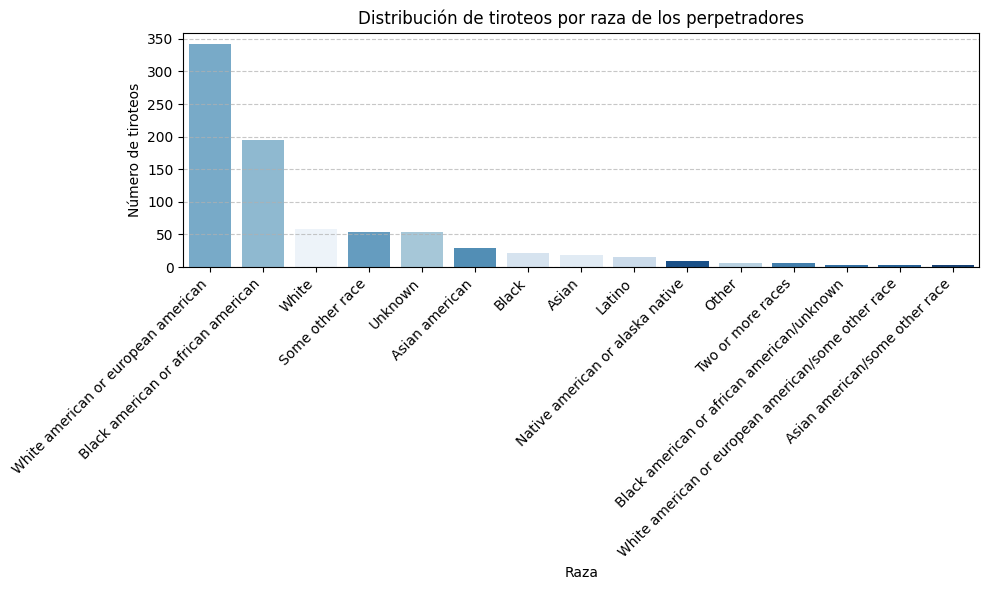

In [ ]:
import pandas as pd


# Normalizar los valores en la columna 'Race' usando .loc
df.loc[:, 'Race'] = df['Race'].str.lower().str.capitalize()

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Race', order=df['Race'].value_counts().index, hue='Race', palette='Blues', dodge=False, legend=False)
plt.title('Distribución de tiroteos por raza de los perpetradores')
plt.xlabel('Raza')
plt.ylabel('Número de tiroteos')
plt.xticks(rotation=45, ha='right')  # Ajustar la alineación de las etiquetas
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajustar el layout para evitar que las etiquetas se corten
plt.show()

## Proporción de Tiroteos por Tipo de Objetivo

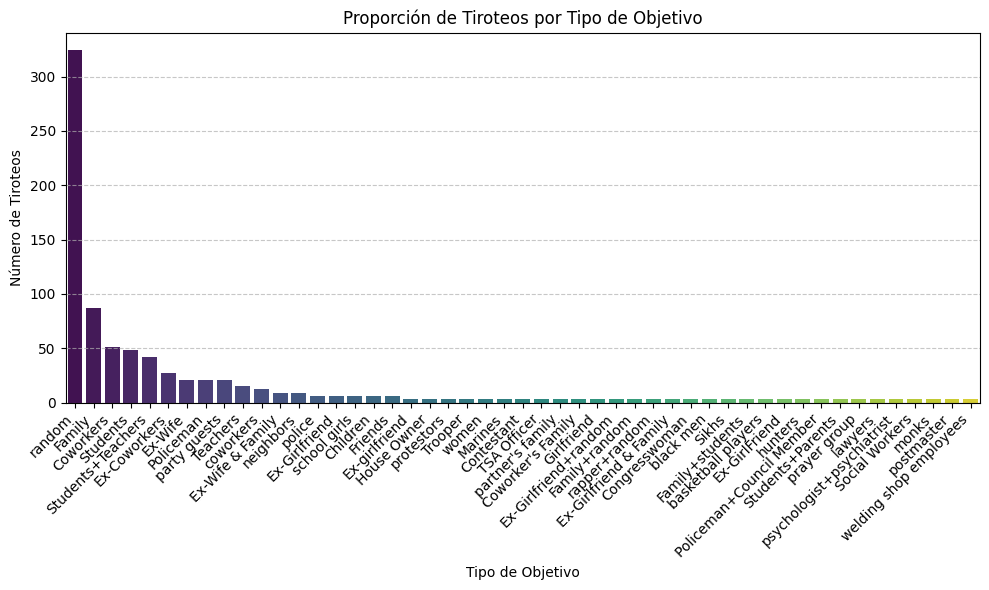

In [ ]:
# Proporción de tiroteos por tipo de objetivo
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Target', order=df['Target'].value_counts().index, palette='viridis')
plt.title('Proporción de Tiroteos por Tipo de Objetivo')
plt.xlabel('Tipo de Objetivo')
plt.ylabel('Número de Tiroteos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#*Definición del Problema:*

En primer lugar, se identificó el tipo de problema a resolver. En este caso, se trata de un problema de regresión, ya que el objetivo es predecir un valor numérico continuo a partir de ciertas características de entrada. Esta definición es crucial para seleccionar los estimadores adecuados y las métricas de evaluación más representativas, como el error absoluto medio (MAE).

Posibles variables a utilizar para este caso:

* Fatalities
* Injured
* Total victims

In [ ]:
le = LabelEncoder()
categorical_cols = ['Location', 'Open/Close Location', 'Target', 'Race', 'Gender']

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')
        df[col] = le.fit_transform(df[col])

def convertir_si_no(valor):
    if isinstance(valor, str):
        if valor.lower() in ['no', 'nan', 'none', 'n']:
            return 0
        elif valor.lower() in ['yes', 'sí', 'si', 'y', 's']:
            return 1
        try:
            return float(valor)
        except ValueError:
            return np.nan
    return valor

columnas_a_revisar = ['Employeed (Y/N)', 'Target', 'Mental Health Issues']
for col in columnas_a_revisar:
    if col in df.columns:
        df[col] = df[col].apply(convertir_si_no)

columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
for col in columnas_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(0)

print("\nTipos de datos después de la limpieza:")
print(df.dtypes)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df = df.drop('Date', axis=1)


Tipos de datos después de la limpieza:
Location                         int64
Date                    datetime64[ns]
Open/Close Location              int64
Target                           int64
Fatalities                       int64
Injured                          int64
Total victims                    int64
Policeman Killed               float64
Age                            float64
Employeed (Y/N)                float64
Mental Health Issues           float64
Race                             int64
Gender                           int64
Year                             int32
State                           object
dtype: object


Decision Tree - MAE: 0.2540, MSE: 4.3911, R²: 0.9105


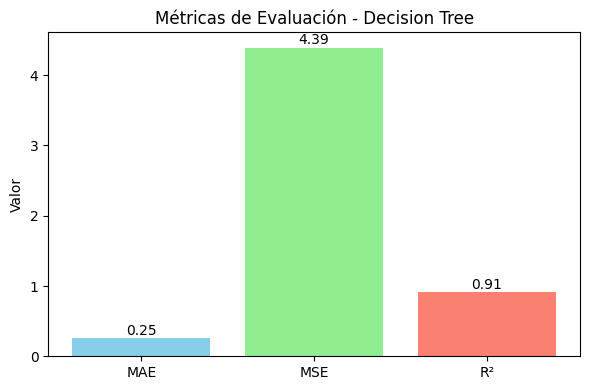

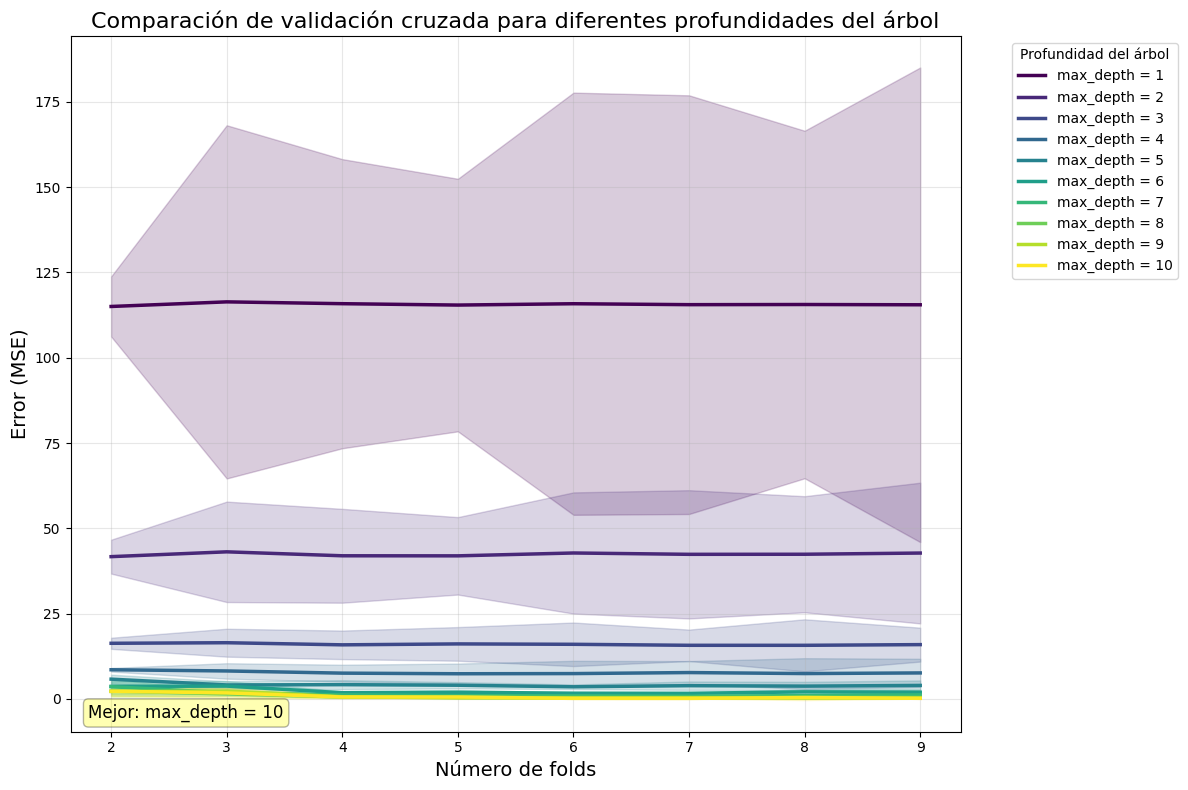

max_depth = 1


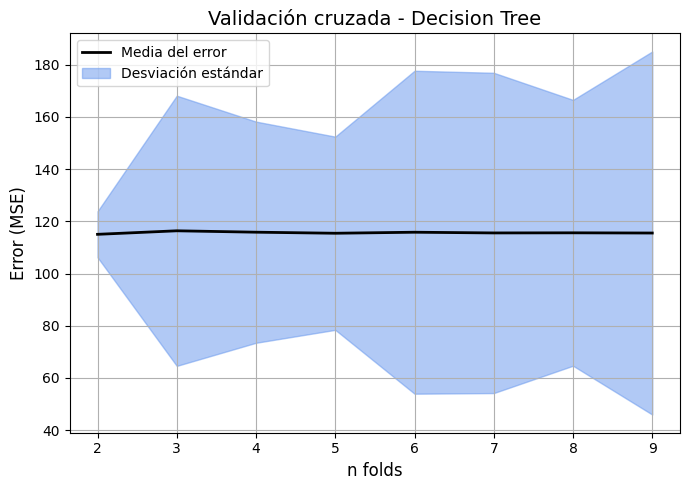

max_depth = 8


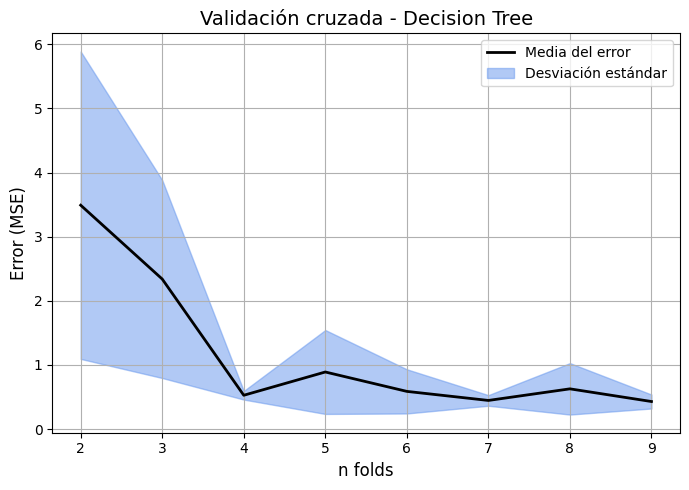

max_depth = 9


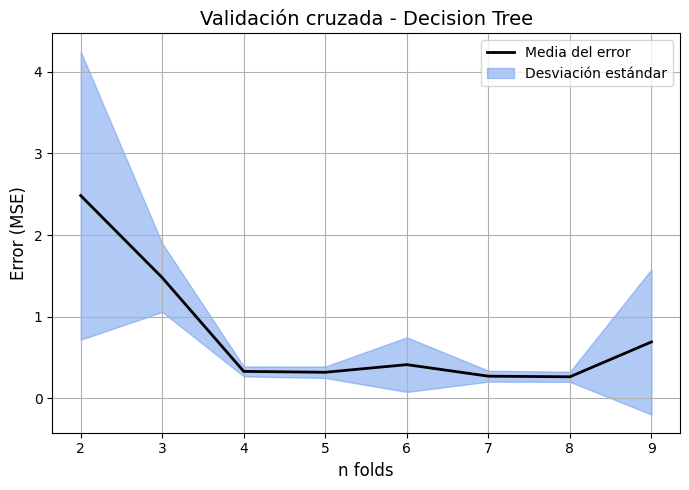

max_depth = 10


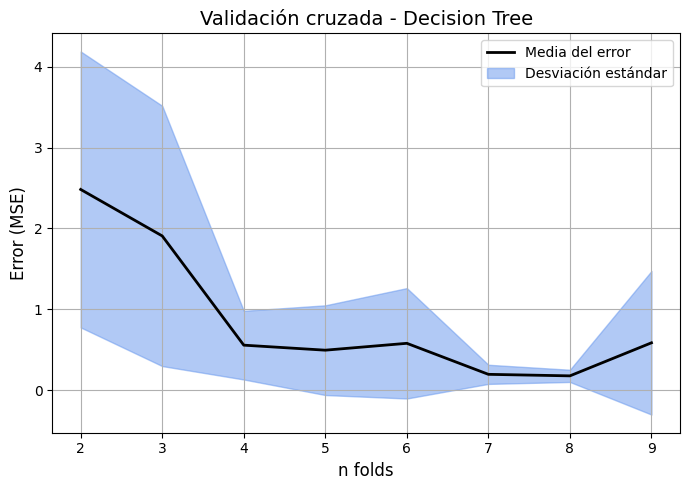

In [ ]:
df = df.drop(["State"], axis=1)
X = df.drop('Total victims', axis=1)  # Características
y = df['Total victims']  #Ground Truth

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree - MAE: {mae_dt:.4f}, MSE: {mse_dt:.4f}, R²: {r2_dt:.4f}")

fig, ax = plt.subplots(figsize=(6, 4))
metricas = ['MAE', 'MSE', 'R²']
valores = [mae_dt, mse_dt, r2_dt]
ax.bar(metricas, valores, color=['skyblue', 'lightgreen', 'salmon'])
ax.set_title('Métricas de Evaluación - Decision Tree')
ax.set_ylabel('Valor')
for i, v in enumerate(valores):
    ax.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()

def show_crossval_curve(est, X, y):
    means, stds = [], []
    nfolds_range = range(2, 10)

    for nfolds in nfolds_range:
        scores = cross_val_score(est, X, y,
                                 cv=KFold(nfolds, shuffle=True, random_state=21),
                                 scoring=make_scorer(mean_squared_error))
        means.append(np.mean(scores))
        stds.append(np.std(scores))

    means = np.array(means)
    stds = np.array(stds)

    plt.figure(figsize=(7, 5))
    plt.plot(nfolds_range, means, label="Media del error", color="black", linewidth=2)
    plt.fill_between(nfolds_range, means - stds, means + stds,
                     color="cornflowerblue", alpha=0.5, label="Desviación estándar")
    plt.xlabel("n folds", fontsize=12)
    plt.ylabel("Error (MSE)", fontsize=12)
    plt.title("Validación cruzada - Decision Tree", fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def show_crossval_curves_alt(X, y, max_depths=range(1, 11)):
    nfolds_range = range(2, 10)

    plt.figure(figsize=(12, 8))

    colors = plt.cm.viridis(np.linspace(0, 1, len(max_depths)))

    all_means = []
    best_depths = []

    for i, max_depth in enumerate(max_depths):
        est = DecisionTreeRegressor(max_depth=max_depth)
        means, stds = [], []

        for nfolds in nfolds_range:
            scores = cross_val_score(est, X, y,
                                    cv=KFold(nfolds, shuffle=True, random_state=21),
                                    scoring=make_scorer(mean_squared_error))
            means.append(np.mean(scores))
            stds.append(np.std(scores))

        all_means.append(means)
        best_depths.append(np.min(means))

        plt.plot(nfolds_range, means, color=colors[i], linewidth=2.5,
                label=f'max_depth = {max_depth}')
        plt.fill_between(nfolds_range,
                         np.array(means) - np.array(stds),
                         np.array(means) + np.array(stds),
                         color=colors[i], alpha=0.2)

    best_idx = np.argmin(best_depths)
    best_max_depth = max_depths[best_idx]

    plt.xlabel('Número de folds', fontsize=14)
    plt.ylabel('Error (MSE)', fontsize=14)
    plt.title('Comparación de validación cruzada para diferentes profundidades del árbol',
             fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.legend(title='Profundidad del árbol', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.annotate(f'Mejor: max_depth = {best_max_depth}',
                xy=(0.02, 0.02), xycoords='axes fraction',
                fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3))

    plt.tight_layout()
    plt.show()

    return best_max_depth

show_crossval_curves_alt(X, y)
print('max_depth = 1')
show_crossval_curve(DecisionTreeRegressor(max_depth=1), X, y)
print('max_depth = 8')
show_crossval_curve(DecisionTreeRegressor(max_depth=8), X, y)
print('max_depth = 9')
show_crossval_curve(DecisionTreeRegressor(max_depth=9), X, y)
print('max_depth = 10')
show_crossval_curve(DecisionTreeRegressor(max_depth=10), X, y)


Random Forest - MAE: 0.2867, MSE: 0.3979, R²: 0.9919


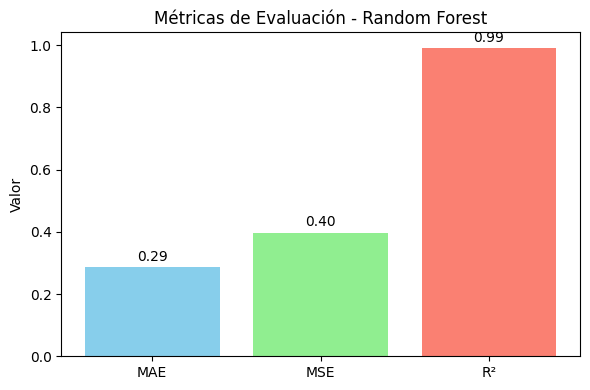

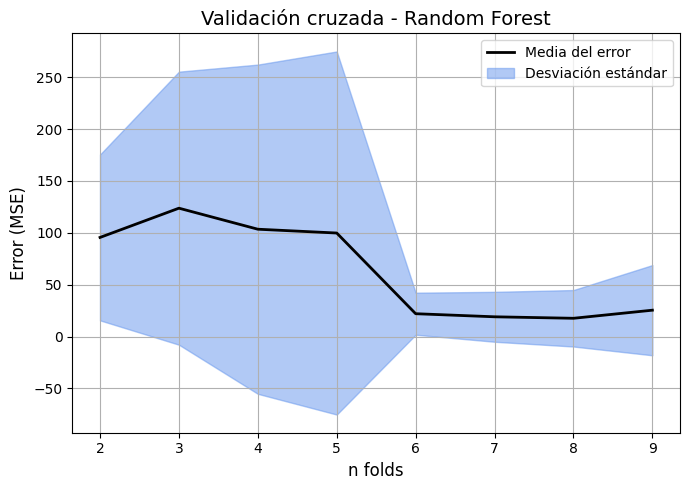

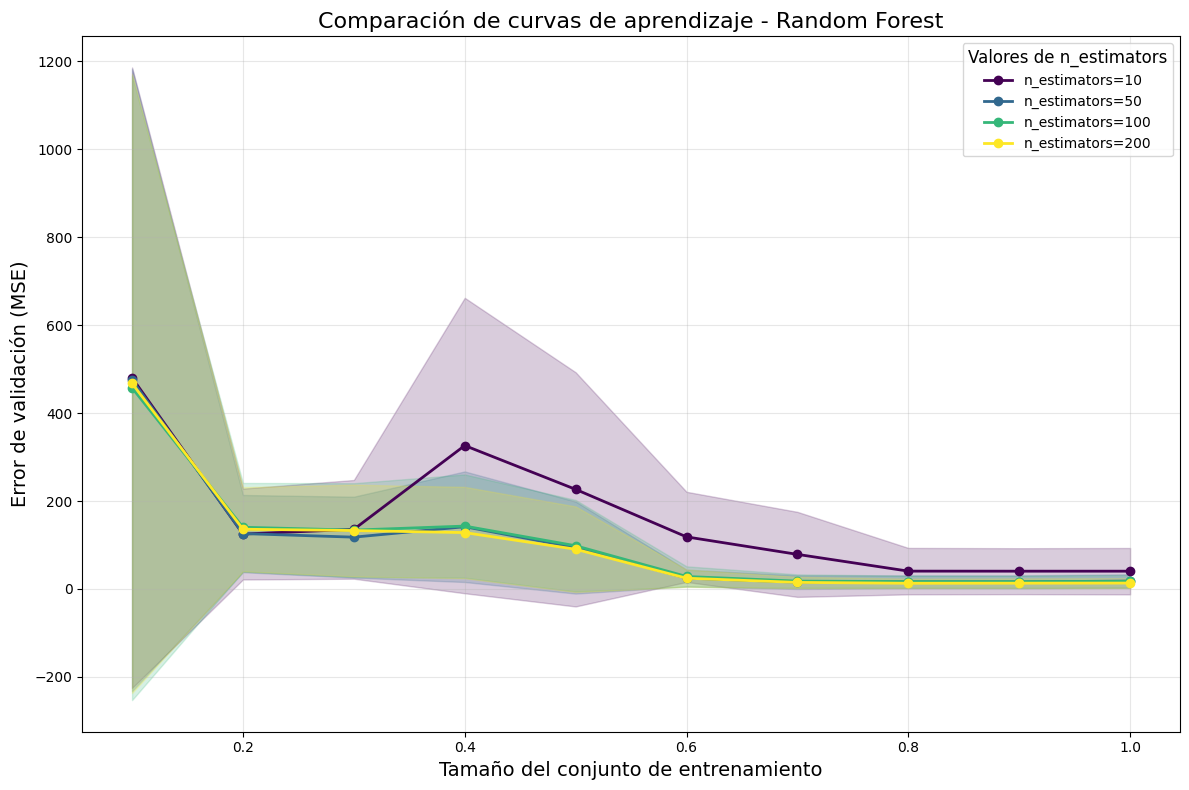

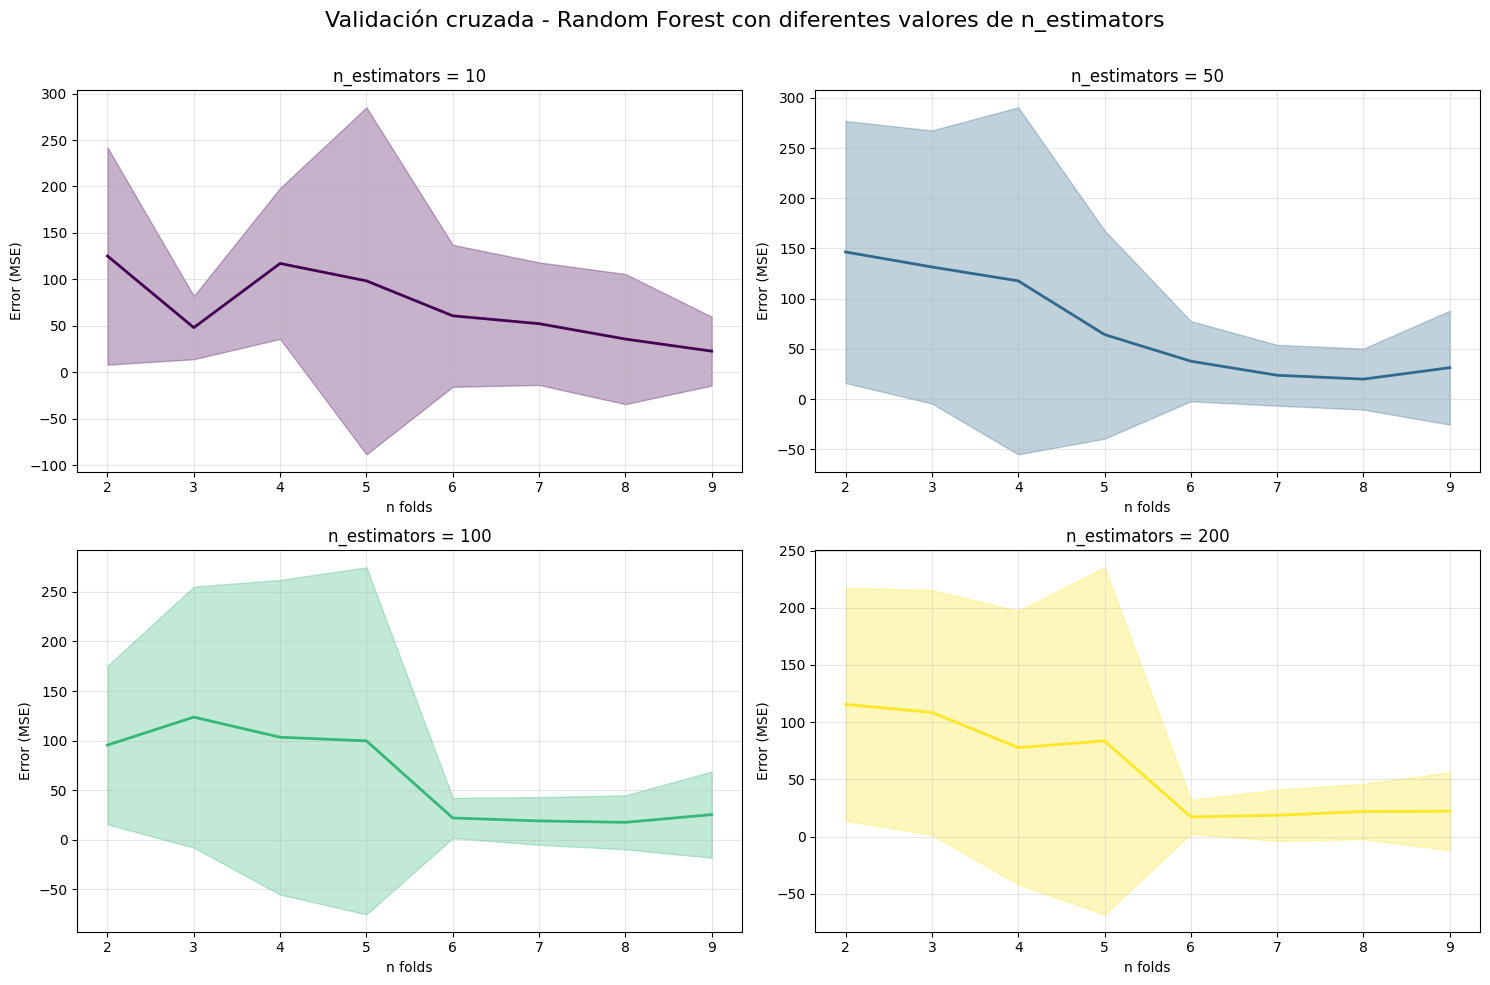

In [ ]:
X = df.drop('Total victims', axis=1)  # Características
y = df['Total victims']  #Ground Truth

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MAE: {mae_rf:.4f}, MSE: {mse_rf:.4f}, R²: {r2_rf:.4f}")
scaler = StandardScaler()

fig, ax = plt.subplots(figsize=(6, 4))
metricas = ['MAE', 'MSE', 'R²']
valores = [mae_rf, mse_rf, r2_rf]
ax.bar(metricas, valores, color=['skyblue', 'lightgreen', 'salmon'])
ax.set_title('Métricas de Evaluación - Random Forest')
ax.set_ylabel('Valor')
for i, v in enumerate(valores):
    ax.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()

###################

def show_crossval_curve(est, X, y, title="Validación cruzada - Random Forest"):

    means, stds = [], []
    nfolds_range = range(2, 10)

    for nfolds in nfolds_range:
        scores = cross_val_score(est, X, y,
                               cv=KFold(nfolds, shuffle=True, random_state=21),
                               scoring=make_scorer(mean_squared_error))
        means.append(np.mean(scores))
        stds.append(np.std(scores))

    means = np.array(means)
    stds = np.array(stds)

    plt.figure(figsize=(7, 5))
    plt.plot(nfolds_range, means, label="Media del error", color="black", linewidth=2)
    plt.fill_between(nfolds_range, means - stds, means + stds,
                   color="cornflowerblue", alpha=0.5, label="Desviación estándar")
    plt.xlabel("n folds", fontsize=12)
    plt.ylabel("Error (MSE)", fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_rf_learning_curve(X, y, n_estimators=100, max_depth=None, random_state=21):

    rf = RandomForestRegressor(n_estimators=n_estimators,
                              max_depth=max_depth,
                              random_state=random_state)

    train_sizes = np.linspace(0.1, 1.0, 10)

    train_sizes, train_scores, test_scores = learning_curve(
        rf, X, y, cv=5, scoring='neg_mean_squared_error',
        train_sizes=train_sizes, random_state=random_state, n_jobs=-1)

    train_scores = -train_scores
    test_scores = -test_scores

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Error de entrenamiento')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                    alpha=0.1, color='blue')

    plt.plot(train_sizes, test_mean, 'o-', color='red', label='Error de validación')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                    alpha=0.1, color='red')

    plt.title(f'Curva de aprendizaje - Random Forest (n_estimators={n_estimators}, max_depth={max_depth})',
             fontsize=14)
    plt.xlabel('Tamaño del conjunto de entrenamiento', fontsize=12)
    plt.ylabel('Error (MSE)', fontsize=12)
    plt.legend(loc='upper right', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def compare_rf_params(X, y, param_name='n_estimators', param_values=None, random_state=21):
    if param_name == 'n_estimators' and param_values is None:
        param_values = [10, 50, 100, 200]
    elif param_name == 'max_depth' and param_values is None:
        param_values = [None, 3, 5, 10]

    plt.figure(figsize=(12, 8))

    colors = plt.cm.viridis(np.linspace(0, 1, len(param_values)))

    train_sizes = np.linspace(0.1, 1.0, 10)

    for i, value in enumerate(param_values):
        if param_name == 'n_estimators':
            rf = RandomForestRegressor(n_estimators=value, random_state=random_state)
            label = f'n_estimators={value}'
        else:  # max_depth
            rf = RandomForestRegressor(max_depth=value, random_state=random_state)
            label = f'max_depth={value if value is not None else "None"}'

        _, train_scores, test_scores = learning_curve(
            rf, X, y, cv=5, scoring='neg_mean_squared_error',
            train_sizes=train_sizes, random_state=random_state, n_jobs=-1)

        test_scores = -test_scores
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        plt.plot(train_sizes, test_mean, 'o-', color=colors[i], linewidth=2, label=label)
        plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                       color=colors[i], alpha=0.2)

    plt.title(f'Comparación de curvas de aprendizaje - Random Forest', fontsize=16)
    plt.xlabel('Tamaño del conjunto de entrenamiento', fontsize=14)
    plt.ylabel('Error de validación (MSE)', fontsize=14)
    plt.legend(title=f'Valores de {param_name}', title_fontsize=12, fontsize=10,
              loc='upper right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def show_multiple_rf_crossval_curves(X, y, param_values=None, param_name='n_estimators', random_state=21):

    if param_name == 'n_estimators' and param_values is None:
        param_values = [10, 50, 100, 200]
    elif param_name == 'max_depth' and param_values is None:
        param_values = [None, 3, 5, 10]

    n_plots = len(param_values)
    nfolds_range = range(2, 10)

    if n_plots <= 2:
        fig, axes = plt.subplots(1, n_plots, figsize=(15, 5))
    else:
        fig, axes = plt.subplots((n_plots+1)//2, 2, figsize=(15, 10))
        axes = axes.flatten()

    colors = plt.cm.viridis(np.linspace(0, 1, n_plots))

    all_means = []

    for i, value in enumerate(param_values):
        if param_name == 'n_estimators':
            rf = RandomForestRegressor(n_estimators=value, random_state=random_state)
            param_text = f'n_estimators = {value}'
        else:  # max_depth
            rf = RandomForestRegressor(max_depth=value, random_state=random_state)
            param_text = f'max_depth = {value if value is not None else "None"}'

        means, stds = [], []

        for nfolds in nfolds_range:
            scores = cross_val_score(rf, X, y,
                                   cv=KFold(nfolds, shuffle=True, random_state=random_state),
                                   scoring=make_scorer(mean_squared_error))
            means.append(np.mean(scores))
            stds.append(np.std(scores))

        all_means.append(means)

        ax = axes[i]
        ax.plot(nfolds_range, means, color=colors[i], linewidth=2)
        ax.fill_between(nfolds_range,
                       np.array(means) - np.array(stds),
                       np.array(means) + np.array(stds),
                       color=colors[i], alpha=0.3)

        ax.set_title(param_text, fontsize=12)
        ax.set_xlabel('n folds')
        ax.set_ylabel('Error (MSE)')
        ax.grid(True, alpha=0.3)

    if n_plots < len(axes):
        ax_summary = axes[-1]

        for i, value in enumerate(param_values):
            if param_name == 'n_estimators':
                label = f'n_est = {value}'
            else:
                label = f'max_d = {value if value is not None else "None"}'

            ax_summary.plot(nfolds_range, all_means[i], color=colors[i],
                          linewidth=2, label=label)

        ax_summary.set_title('Comparación de todos los modelos', fontsize=14)
        ax_summary.set_xlabel('n folds', fontsize=12)
        ax_summary.set_ylabel('Error (MSE)', fontsize=12)
        ax_summary.grid(True, alpha=0.3)
        ax_summary.legend()

    for j in range(n_plots, len(axes)-1):
        fig.delaxes(axes[j])

    plt.suptitle(f'Validación cruzada - Random Forest con diferentes valores de {param_name}',
                fontsize=16, y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()


rf = RandomForestRegressor(n_estimators=100, random_state=21)

show_crossval_curve(rf, X, y)

compare_rf_params(X, y, param_name='n_estimators', param_values=[10, 50, 100, 200])

show_multiple_rf_crossval_curves(X, y, param_name='n_estimators')

SVR - MAE: 2.7042, MSE: 30.3256, R²: 0.3820


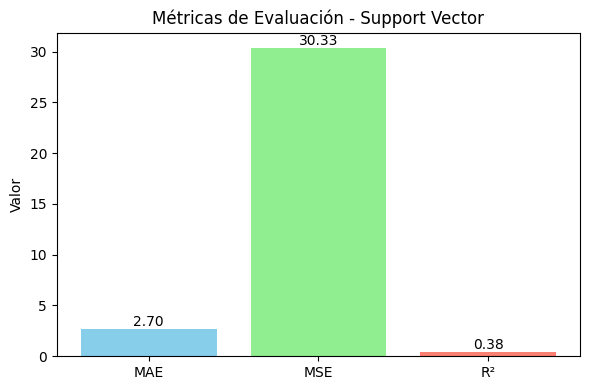

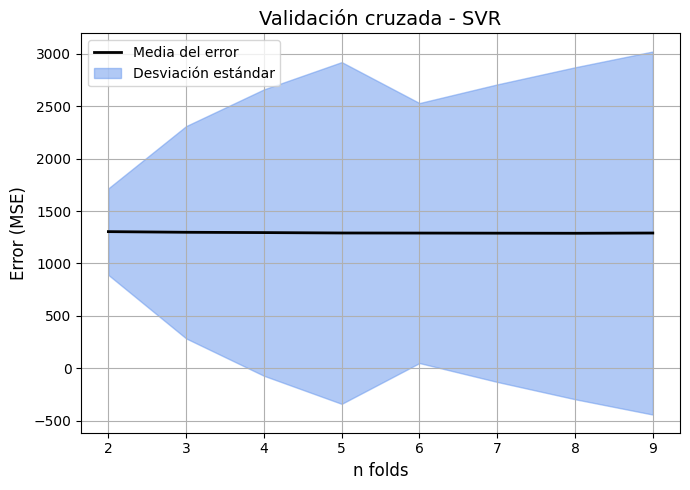

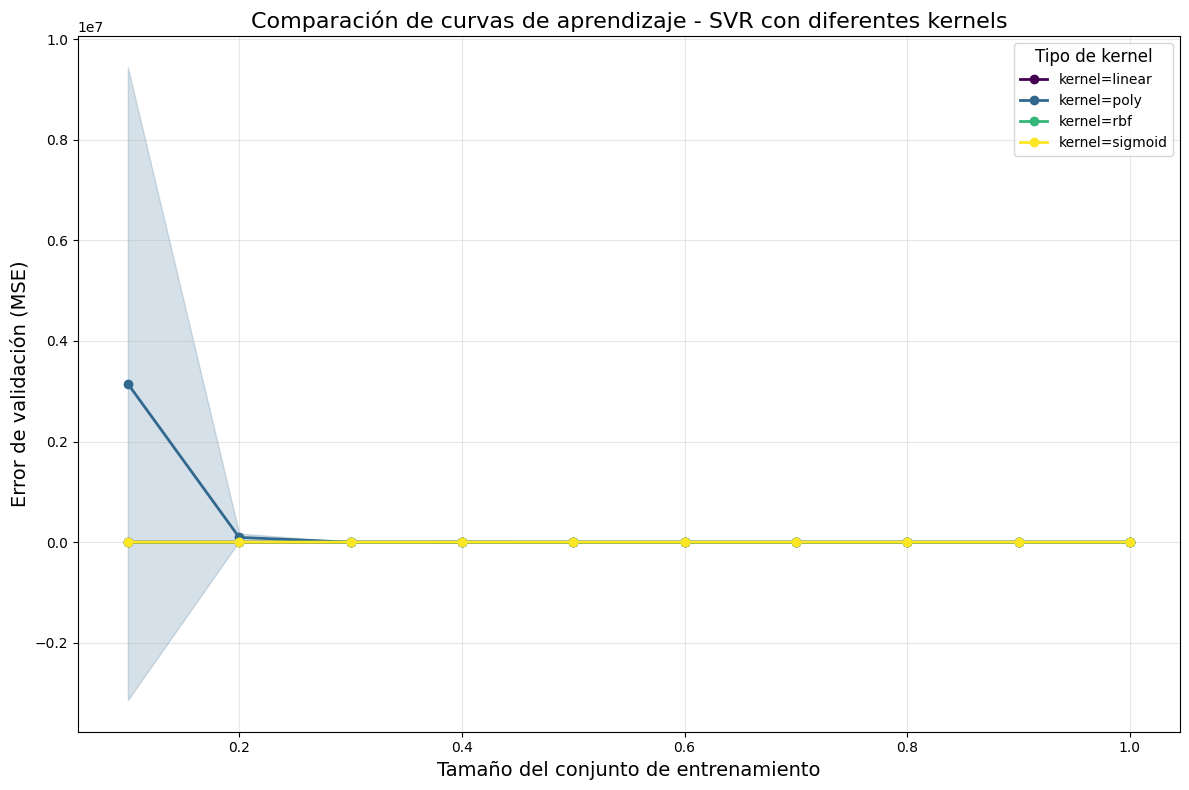

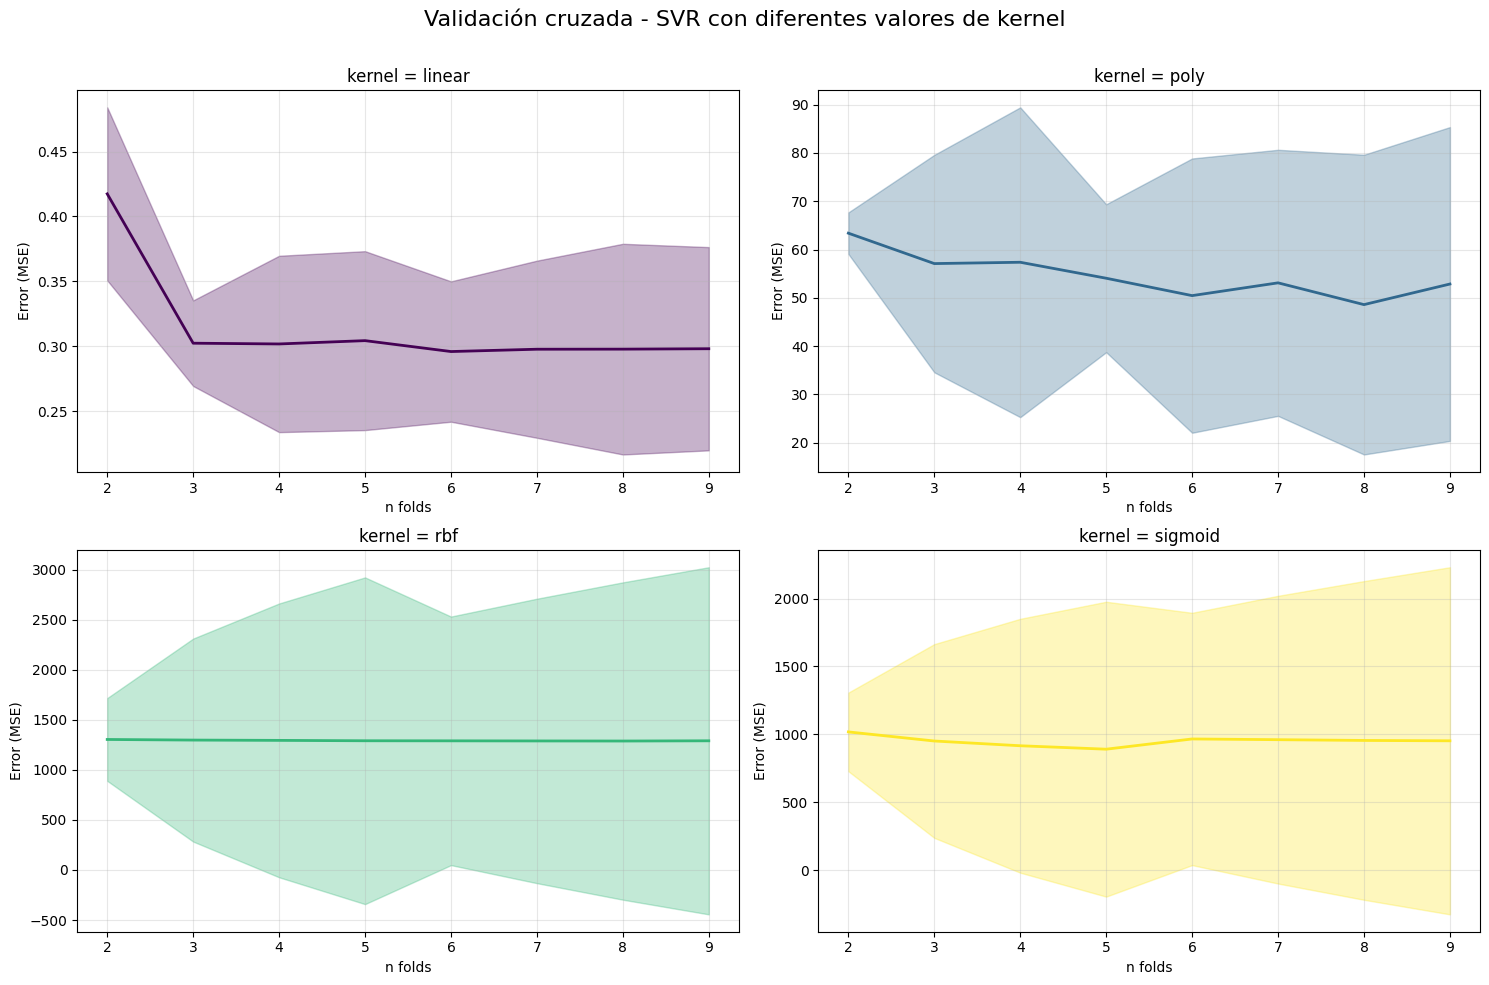

In [ ]:
X = df.drop('Total victims', axis=1)  # Características
y = df['Total victims']  #Ground Truth

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr = SVR()
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"SVR - MAE: {mae_svr:.4f}, MSE: {mse_svr:.4f}, R²: {r2_svr:.4f}")

fig, ax = plt.subplots(figsize=(6, 4))
metricas = ['MAE', 'MSE', 'R²']
valores = [mae_svr, mse_svr, r2_svr]
ax.bar(metricas, valores, color=['skyblue', 'lightgreen', 'salmon'])
ax.set_title('Métricas de Evaluación - Support Vector')
ax.set_ylabel('Valor')
for i, v in enumerate(valores):
    ax.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold, learning_curve
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd

def show_crossval_curve(est, X, y, title="Validación cruzada - SVR", scale_data=True):

    if scale_data:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('svr', est)
        ])
        estimator = pipeline
    else:
        estimator = est

    means, stds = [], []
    nfolds_range = range(2, 10)

    for nfolds in nfolds_range:
        scores = cross_val_score(estimator, X, y,
                               cv=KFold(nfolds, shuffle=True, random_state=21),
                               scoring=make_scorer(mean_squared_error))
        means.append(np.mean(scores))
        stds.append(np.std(scores))

    means = np.array(means)
    stds = np.array(stds)

    plt.figure(figsize=(7, 5))
    plt.plot(nfolds_range, means, label="Media del error", color="black", linewidth=2)
    plt.fill_between(nfolds_range, means - stds, means + stds,
                   color="cornflowerblue", alpha=0.5, label="Desviación estándar")
    plt.xlabel("n folds", fontsize=12)
    plt.ylabel("Error (MSE)", fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_svm_learning_curve(X, y, kernel='rbf', C=1.0, gamma='scale', epsilon=0.1, random_state=21):

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR(kernel=kernel, C=C, gamma=gamma, epsilon=epsilon))
    ])

    train_sizes = np.linspace(0.1, 1.0, 10)

    train_sizes, train_scores, test_scores = learning_curve(
        pipeline, X, y, cv=5, scoring='neg_mean_squared_error',
        train_sizes=train_sizes, random_state=random_state, n_jobs=-1)

    train_scores = -train_scores
    test_scores = -test_scores

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Error de entrenamiento')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                    alpha=0.1, color='blue')

    plt.plot(train_sizes, test_mean, 'o-', color='red', label='Error de validación')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                    alpha=0.1, color='red')

    plt.title(f'Curva de aprendizaje - SVR (kernel={kernel}, C={C})', fontsize=14)
    plt.xlabel('Tamaño del conjunto de entrenamiento', fontsize=12)
    plt.ylabel('Error (MSE)', fontsize=12)
    plt.legend(loc='upper right', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def compare_svm_kernels(X, y, kernels=None, random_state=21):

    if kernels is None:
        kernels = ['linear', 'poly', 'rbf', 'sigmoid']

    plt.figure(figsize=(12, 8))

    colors = plt.cm.viridis(np.linspace(0, 1, len(kernels)))

    train_sizes = np.linspace(0.1, 1.0, 10)

    for i, kernel in enumerate(kernels):
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('svr', SVR(kernel=kernel))
        ])

        _, train_scores, test_scores = learning_curve(
            pipeline, X, y, cv=5, scoring='neg_mean_squared_error',
            train_sizes=train_sizes, random_state=random_state, n_jobs=-1)

        test_scores = -test_scores
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        plt.plot(train_sizes, test_mean, 'o-', color=colors[i], linewidth=2, label=f'kernel={kernel}')
        plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                       color=colors[i], alpha=0.2)

    plt.title(f'Comparación de curvas de aprendizaje - SVR con diferentes kernels', fontsize=16)
    plt.xlabel('Tamaño del conjunto de entrenamiento', fontsize=14)
    plt.ylabel('Error de validación (MSE)', fontsize=14)
    plt.legend(title='Tipo de kernel', title_fontsize=12, fontsize=10,
              loc='upper right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def compare_svm_params(X, y, param_name='C', param_values=None, kernel='rbf', random_state=21):

    if param_name == 'C' and param_values is None:
        param_values = [0.1, 1.0, 10.0, 100.0]
    elif param_name == 'gamma' and param_values is None:
        param_values = ['scale', 'auto', 0.1, 1.0]
    elif param_name == 'epsilon' and param_values is None:
        param_values = [0.01, 0.1, 0.2, 0.5]

    plt.figure(figsize=(12, 8))

    colors = plt.cm.viridis(np.linspace(0, 1, len(param_values)))

    train_sizes = np.linspace(0.1, 1.0, 10)

    for i, value in enumerate(param_values):
        if param_name == 'C':
            svr = SVR(kernel=kernel, C=value)
            label = f'C={value}'
        elif param_name == 'gamma':
            svr = SVR(kernel=kernel, gamma=value)
            label = f'gamma={value}'
        else:  # epsilon
            svr = SVR(kernel=kernel, epsilon=value)
            label = f'epsilon={value}'

        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('svr', svr)
        ])

        _, train_scores, test_scores = learning_curve(
            pipeline, X, y, cv=5, scoring='neg_mean_squared_error',
            train_sizes=train_sizes, random_state=random_state, n_jobs=-1)

        test_scores = -test_scores
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        plt.plot(train_sizes, test_mean, 'o-', color=colors[i], linewidth=2, label=label)
        plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                       color=colors[i], alpha=0.2)

    plt.title(f'Comparación de curvas de aprendizaje - SVR con diferentes valores de {param_name} (kernel={kernel})',
             fontsize=16)
    plt.xlabel('Tamaño del conjunto de entrenamiento', fontsize=14)
    plt.ylabel('Error de validación (MSE)', fontsize=14)
    plt.legend(title=f'Valores de {param_name}', title_fontsize=12, fontsize=10,
              loc='upper right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def show_multiple_svm_crossval_curves(X, y, param_name='kernel', param_values=None, random_state=21):

    if param_name == 'kernel' and param_values is None:
        param_values = ['linear', 'poly', 'rbf', 'sigmoid']
    elif param_name == 'C' and param_values is None:
        param_values = [0.1, 1.0, 10.0, 100.0]
    elif param_name == 'gamma' and param_values is None:
        param_values = ['scale', 'auto', 0.1, 1.0]
    elif param_name == 'epsilon' and param_values is None:
        param_values = [0.01, 0.1, 0.2, 0.5]

    n_plots = len(param_values)
    nfolds_range = range(2, 10)

    if n_plots <= 2:
        fig, axes = plt.subplots(1, n_plots, figsize=(15, 5))
        if n_plots == 1:
            axes = [axes]  # Convertir a lista para iterar consistentemente
    else:
        rows = (n_plots + 1) // 2
        fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows))
        axes = axes.flatten()

    colors = plt.cm.viridis(np.linspace(0, 1, n_plots))

    all_means = []

    for i, value in enumerate(param_values):
        if param_name == 'kernel':
            svr = SVR(kernel=value)
            param_text = f'kernel = {value}'
        elif param_name == 'C':
            svr = SVR(C=value)
            param_text = f'C = {value}'
        elif param_name == 'gamma':
            svr = SVR(gamma=value)
            param_text = f'gamma = {value}'
        else:  # epsilon
            svr = SVR(epsilon=value)
            param_text = f'epsilon = {value}'

        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('svr', svr)
        ])

        means, stds = [], []

        for nfolds in nfolds_range:
            scores = cross_val_score(pipeline, X, y,
                                   cv=KFold(nfolds, shuffle=True, random_state=random_state),
                                   scoring=make_scorer(mean_squared_error))
            means.append(np.mean(scores))
            stds.append(np.std(scores))

        all_means.append(means)

        ax = axes[i]
        ax.plot(nfolds_range, means, color=colors[i], linewidth=2)
        ax.fill_between(nfolds_range,
                      np.array(means) - np.array(stds),
                      np.array(means) + np.array(stds),
                      color=colors[i], alpha=0.3)

        ax.set_title(param_text, fontsize=12)
        ax.set_xlabel('n folds')
        ax.set_ylabel('Error (MSE)')
        ax.grid(True, alpha=0.3)

    if n_plots < len(axes):
        ax_summary = axes[-1]

        for i, value in enumerate(param_values):
            if param_name == 'kernel':
                label = f'{value}'
            elif param_name == 'C':
                label = f'C={value}'
            elif param_name == 'gamma':
                label = f'γ={value}'
            else:
                label = f'ε={value}'

            ax_summary.plot(nfolds_range, all_means[i], color=colors[i],
                          linewidth=2, label=label)

        ax_summary.set_title('Comparación de todos los modelos', fontsize=14)
        ax_summary.set_xlabel('n folds', fontsize=12)
        ax_summary.set_ylabel('Error (MSE)', fontsize=12)
        ax_summary.grid(True, alpha=0.3)
        ax_summary.legend()

    for j in range(n_plots, len(axes)-1):
        fig.delaxes(axes[j])

    plt.suptitle(f'Validación cruzada - SVR con diferentes valores de {param_name}',
                fontsize=16, y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

svr = SVR(kernel='rbf')

show_crossval_curve(svr, X, y)

compare_svm_kernels(X, y)

show_multiple_svm_crossval_curves(X, y, param_name='kernel')

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0035 - mae: 0.0267 - mse: 0.0035 - val_loss: 3.9885e-04 - val_mae: 0.0168 - val_mse: 3.9885e-04
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0047 - mae: 0.0210 - mse: 0.0047 - val_loss: 7.0964e-05 - val_mae: 0.0064 - val_mse: 7.0964e-05
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.1913e-04 - mae: 0.0107 - mse: 5.1913e-04 - val_loss: 1.1794e-04 - val_mae: 0.0069 - val_mse: 1.1794e-04
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.9283e-04 - mae: 0.0116 - mse: 6.9283e-04 - val_loss: 1.7466e-04 - val_mae: 0.0115 - val_mse: 1.7466e-04
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.1056e-04 - mae: 0.0117 - mse: 5.1056e-04 - val_loss: 7.9150e-05 - val_mae: 0.0062 - val_mse: 7.9150e-05
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.5673e-04 - mae: 0.0092 - mse: 2.5673e-04 - val_loss: 1.4239e-04 - val_mae: 0.0103 - val_mse: 1.4239e-04
Epoch 7/10
24/24 ━━━━━━━━━━━━

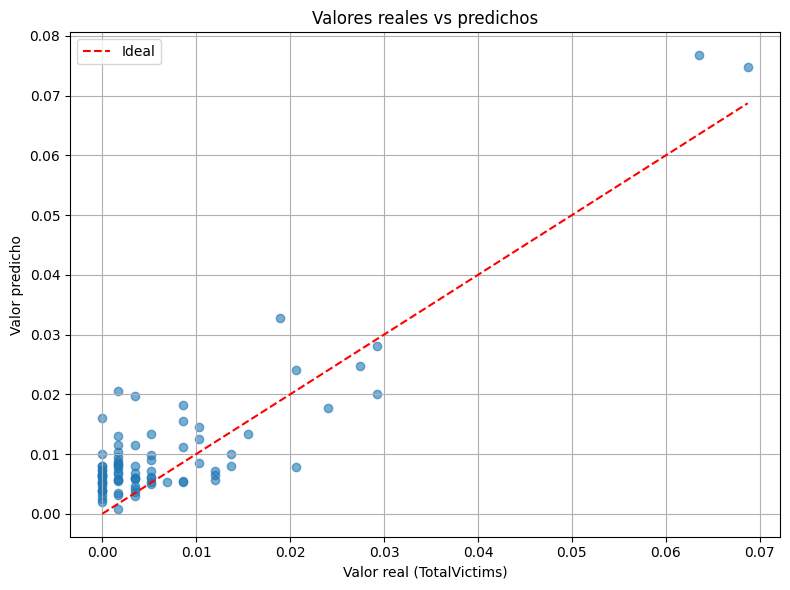

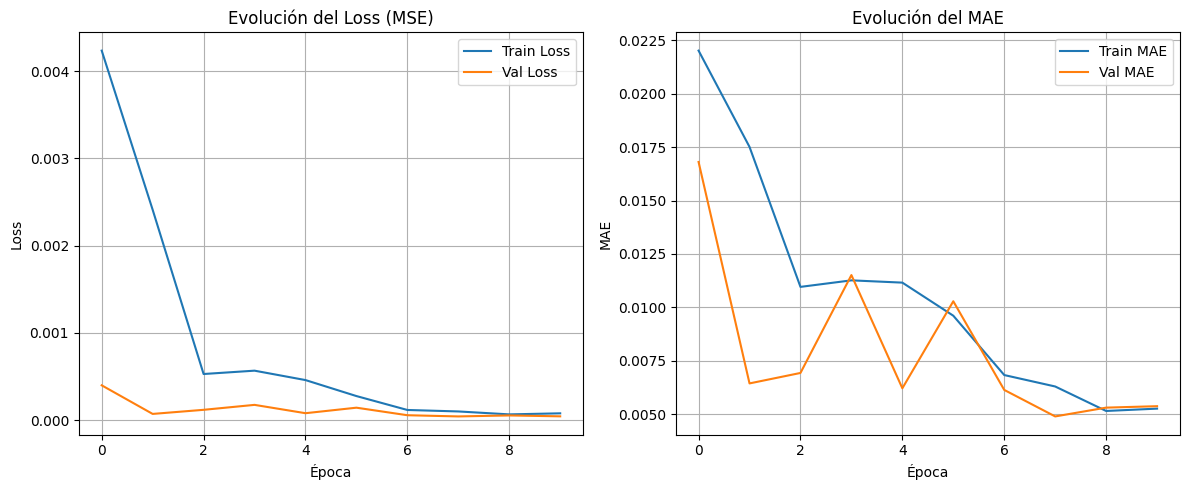

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Dataset educativo simulado de tiroteos en USA
np.random.seed(21)

# Normalización
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

# Separar variables predictoras y target
X = df_scaled.drop(columns=['Total victims'])
y = df_scaled['Total victims']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=21)

# Construcción del modelo
def build_model(input_dim, hidden_layers=6, units=128):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(input_dim,)))
    for _ in range(hidden_layers):
        model.add(keras.layers.Dense(units, activation='relu'))
    model.add(keras.layers.Dense(1))  # Salida única
    return model

model = build_model(input_dim=X_train.shape[1], hidden_layers=6)

# Compilación
model.compile(optimizer=keras.optimizers.Adam(),
              loss='mse',
              metrics=['mse', 'mae'])

# Entrenamiento
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)

# Predicciones
y_pred = model.predict(X_test).flatten()

# Gráfico: valores reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal")
plt.xlabel("Valor real (TotalVictims)")
plt.ylabel("Valor predicho")
plt.title("Valores reales vs predichos")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráficos de entrenamiento
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Evolución del Loss (MSE)')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Evolución del MAE')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0086 - mae: 0.0291 - mse: 0.0086 - val_loss: 7.5293e-05 - val_mae: 0.0066 - val_mse: 7.5293e-05
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0066 - mae: 0.0211 - mse: 0.0066 - val_loss: 9.6650e-05 - val_mae: 0.0081 - val_mse: 9.6650e-05
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.1042e-04 - mae: 0.0109 - mse: 9.1042e-04 - val_loss: 6.4195e-05 - val_mae: 0.0062 - val_mse: 6.4195e-05
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.6531e-04 - mae: 0.0116 - mse: 8.6531e-04 - val_loss: 9.4219e-05 - val_mae: 0.0086 - val_mse: 9.4219e-05
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.7099e-04 - mae: 0.0085 - mse: 3.7099e-04 - val_loss: 5.4035e-05 - val_mae: 0.0056 - val_mse: 5.4035e-05
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.3536e-04 - mae: 0.0079 - mse: 1.3536e-04 - val_loss: 5.9417e-05 - val_mae: 0.0057 - val_mse: 5.9417e-05
Epoch 7/10
24/24 ━━━━━━━━━━

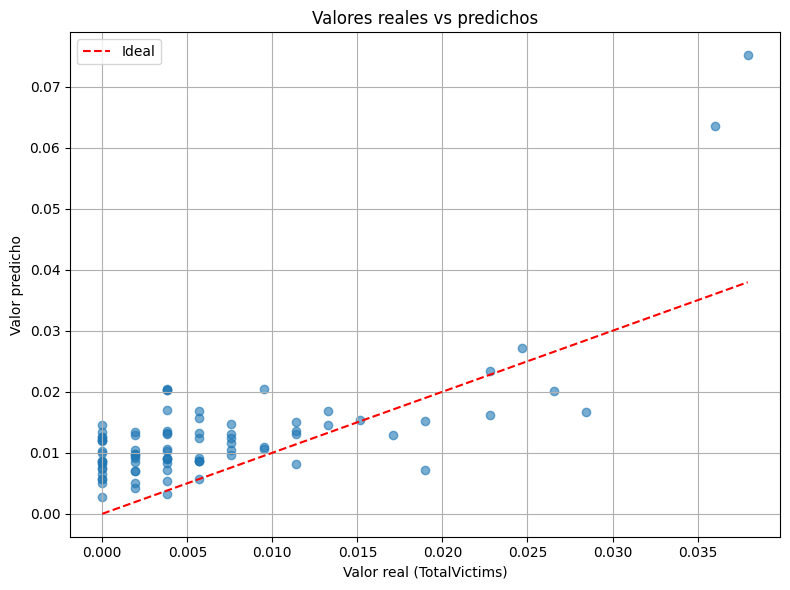

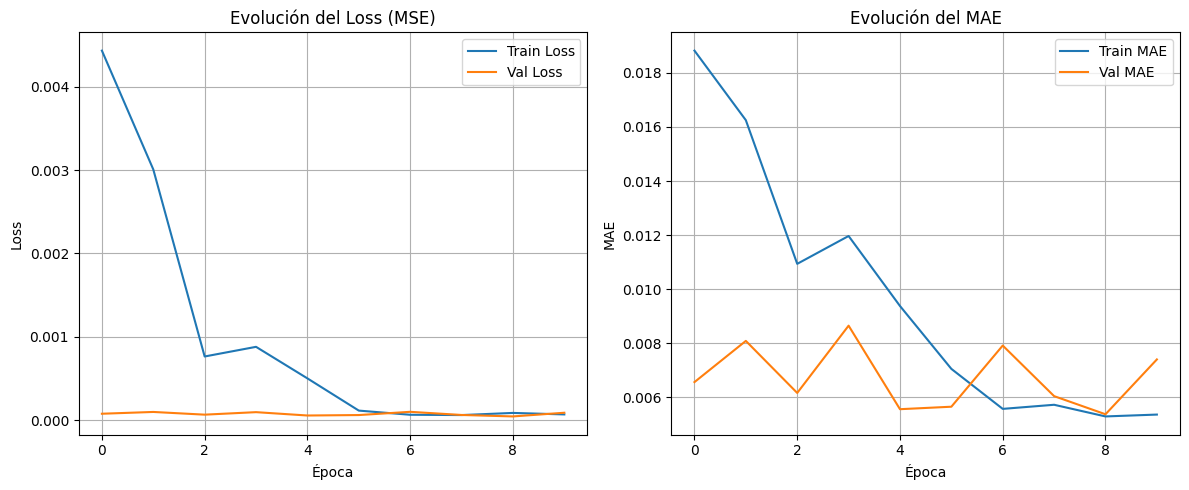

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Dataset educativo simulado de tiroteos en USA
np.random.seed(21)

# Normalización
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

# Separar variables predictoras y target
X = df_scaled.drop(columns=['Injured'])
y = df_scaled['Injured']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=21)

# Construcción del modelo
def build_model(input_dim, hidden_layers=6, units=128):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(input_dim,)))
    for _ in range(hidden_layers):
        model.add(keras.layers.Dense(units, activation='relu'))
    model.add(keras.layers.Dense(1))  # Salida única
    return model

model = build_model(input_dim=X_train.shape[1], hidden_layers=6)

# Compilación
model.compile(optimizer=keras.optimizers.Adam(),
              loss='mse',
              metrics=['mse', 'mae'])

# Entrenamiento
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)

# Predicciones
y_pred = model.predict(X_test).flatten()

# Gráfico: valores reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal")
plt.xlabel("Valor real (TotalVictims)")
plt.ylabel("Valor predicho")
plt.title("Valores reales vs predichos")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráficos de entrenamiento
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Evolución del Loss (MSE)')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Evolución del MAE')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0154 - mae: 0.0646 - mse: 0.0154 - val_loss: 0.0044 - val_mae: 0.0492 - val_mse: 0.0044
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0076 - mae: 0.0482 - mse: 0.0076 - val_loss: 0.0040 - val_mae: 0.0407 - val_mse: 0.0040
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0075 - mae: 0.0513 - mse: 0.0075 - val_loss: 0.0039 - val_mae: 0.0464 - val_mse: 0.0039
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0045 - mae: 0.0433 - mse: 0.0045 - val_loss: 0.0073 - val_mae: 0.0715 - val_mse: 0.0073
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mae: 0.0582 - mse: 0.0074 - val_loss: 0.0037 - val_mae: 0.0416 - val_mse: 0.0037
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031 - mae: 0.0382 - mse: 0.0031 - val_loss: 0.0032 - val_mae: 0.0364 - val_mse: 0.0032
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mae: 0.0409 - mse: 0.0037 - val_loss: 0.00

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


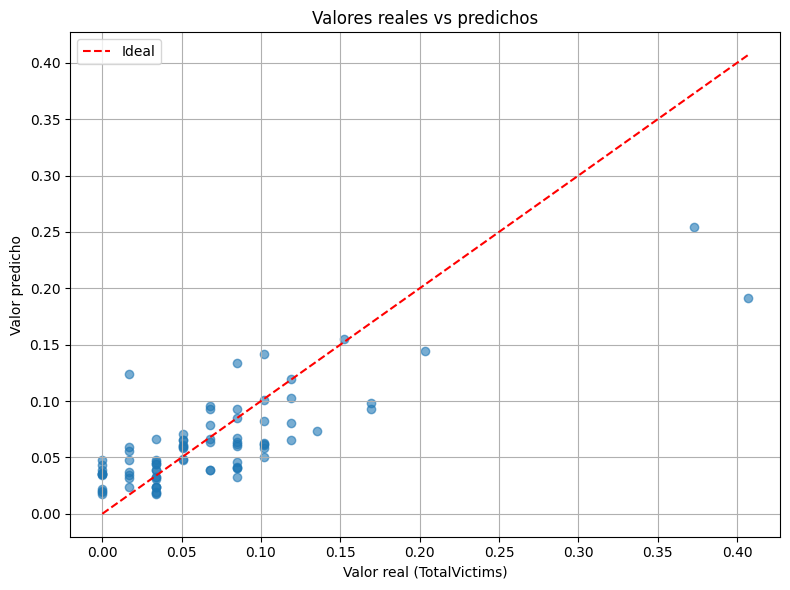

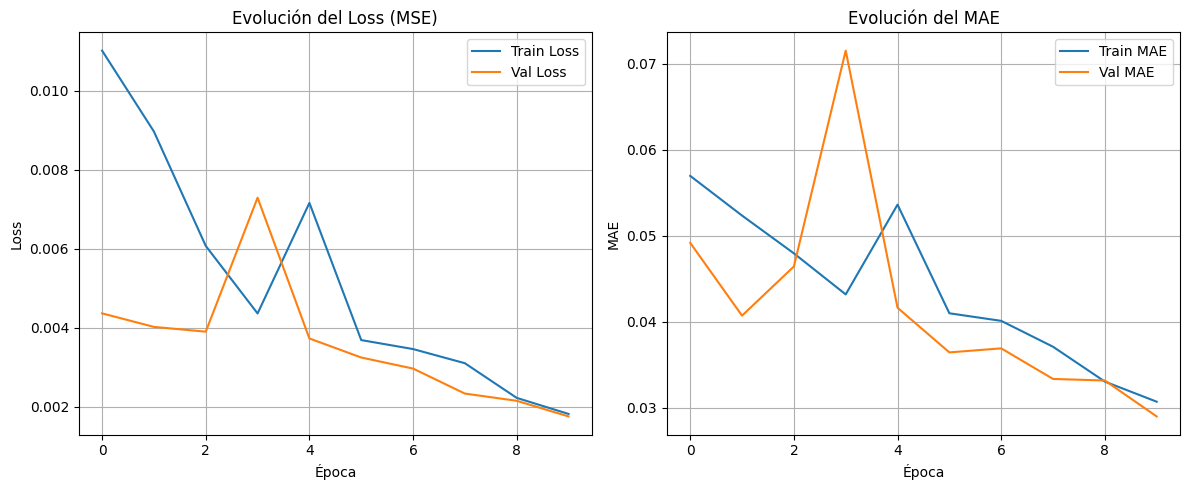

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Dataset educativo simulado de tiroteos en USA
np.random.seed(21)

# Normalización
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

# Separar variables predictoras y target
X = df_scaled.drop(columns=['Fatalities'])
y = df_scaled['Fatalities']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=21)

# Construcción del modelo
def build_model(input_dim, hidden_layers=6, units=128):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(input_dim,)))
    for _ in range(hidden_layers):
        model.add(keras.layers.Dense(units, activation='relu'))
    model.add(keras.layers.Dense(1))  # Salida única
    return model

model = build_model(input_dim=X_train.shape[1], hidden_layers=6)

# Compilación
model.compile(optimizer=keras.optimizers.Adam(),
              loss='mse',
              metrics=['mse', 'mae'])

# Entrenamiento
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)

# Predicciones
y_pred = model.predict(X_test).flatten()

# Gráfico: valores reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal")
plt.xlabel("Valor real (TotalVictims)")
plt.ylabel("Valor predicho")
plt.title("Valores reales vs predichos")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráficos de entrenamiento
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Evolución del Loss (MSE)')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Evolución del MAE')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


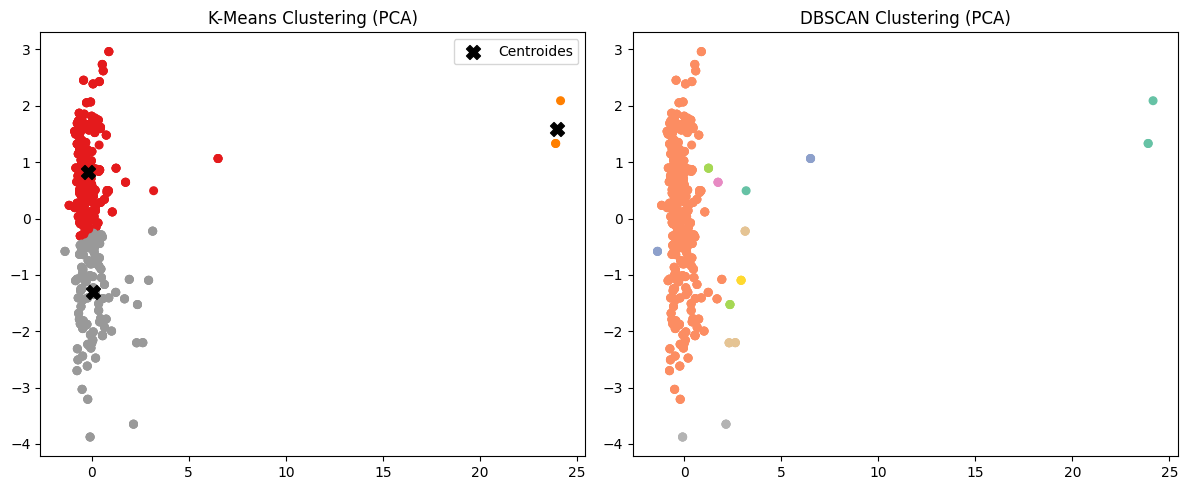

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

# Ya tienes df, asumimos que todas las columnas son numéricas
# --- 1. Escalar los datos ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# --- 2. PCA (2 componentes) ---
pca = PCA(n_components=2, random_state=21)
X_pca = pca.fit_transform(X_scaled)

# --- 3. K-Means ---
kmeans = KMeans(n_clusters=3, random_state=21)
kmeans_labels = kmeans.fit_predict(X_pca)
kmeans_centroids = kmeans.cluster_centers_

# --- 4. DBSCAN ---
dbscan = DBSCAN(min_samples=2, eps=0.5)
dbscan_labels = dbscan.fit_predict(X_pca)

# --- 5. Plotear resultados ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico K-Means
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='Set1', s=30)
axes[0].scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='black', marker='X', s=100, label='Centroides')
axes[0].set_title("K-Means Clustering (PCA)")
axes[0].legend()

# Gráfico DBSCAN
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='Set2', s=30)
axes[1].set_title("DBSCAN Clustering (PCA)")

plt.tight_layout()
plt.show()
